## 1D Diffusion exercise

#### Import Statements

In [223]:
x=11
print((x+10) % 20-10)

-9


In [130]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from matplotlib.animation import FuncAnimation
PI = math.pi

#### Object Definitions

In [119]:
class particle(object):

    def __init__(self, radius, position, ID):
        self._radius = radius
        self._position = position
        self._ID = ID

    #getters
    @property
    def radius(self):
        return self._radius

    @property
    def position(self):
        return self._position
    
    @property
    def ID(self):
        return self._ID

    #setters
    @radius.setter
    def radius(self,value):
        self._radius = value
    
    @position.setter
    def position(self,value):
        self._position=value
    
    @ID.setter
    def ID(self,value):
        self._ID=value

    #deleters
    @radius.deleter
    def radius(self):
        del self._radius
    
    @position.deleter
    def position(self):
        del self._position
    
    @ID.deleter
    def ID(self):
        del self._ID

#### Graph of 1D walk

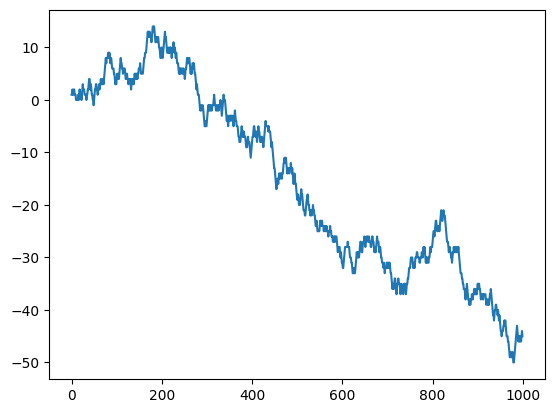

In [112]:
def step(particle):
    return particle+random.choice([-1,0,1])

def go(n):
    p=0
    l=[]
    for i in range(n):
        p=step(p)
        l.append(p)
    return l


plt.plot(go(1000))

#### Method definitions

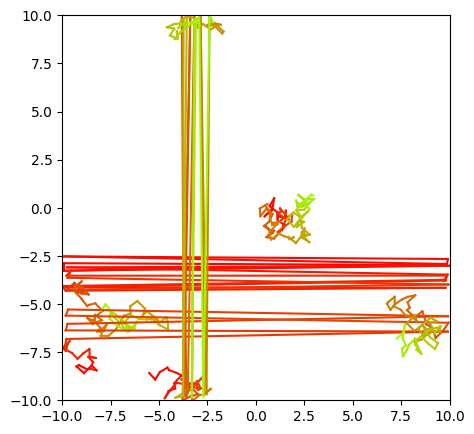

In [224]:
#method to change position of particle by a unit step 
def moveParticle(particle_name):
    x=newBrownianLocation(particle_name,0.000001)[0]
    y=newBrownianLocation(particle_name,0.000001)[1]
    particle_name.position=((x+10) % 20-10,(y+10) % 20-10)

#calculate what the new location would be just based off Brownian Motion
def newBrownianLocation(particle_name,dt):
    theta=random.uniform(0,2*PI)
    r=math.sqrt(160000*dt)
    dx=r*math.cos(theta)
    dy=r*math.sin(theta)

    return (particle_name.position[0]+dx,particle_name.position[1]+dy)


#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n, xrange, yrange):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(xrange[0],xrange[1])
        initial_positiony = np.random.uniform(yrange[0],yrange[1])
        x=particle(2.5, (initial_positionx,initial_positiony),i)
        particle_list.append(x)

#plots particle position as a colored time series
def plotColorSpec(lx,ly):
    length=len(lx)
    t = np.arange(length)
    plt.scatter(lx,ly,c=t)
    plt.show()

def plotLineSpec(lx,ly):
    length=len(lx)
    r=0
    g=0
    b=0
    for i in range(length-1):
        r=1-(.75*i)/(2*length)
        g=i/(length)
        b=2*i/(length**2)
        plt.plot([lx[i],lx[i+1]],[ly[i],ly[i+1]],c=[r,g,b])

#create a simulation function
def simulation(steps,numparticles,xrange,yrange):
    particle_list = []
    #initialize your particles
    placeParticle(particle_list,numparticles,xrange,yrange)

    positions = []
    
    for i in range(len(particle_list)):
        posix=[]
        posiy=[]
        for j in range(steps):
            moveParticle(particle_list[i])
            coordx = particle_list[i].position[0]
            coordy = particle_list[i].position[1]
            posix.append(coordx)
            posiy.append(coordy)
        positions.append([posix,posiy])
    
    #for i in range(numparticles):
    #    plt.plot(positions[i][0],positions[i][1])
    #    plotColorSpec(positions[i][0],positions[i][1])

    for i in range(numparticles):
        plotLineSpec(positions[i][0],positions[i][1])
    
    return positions

#run the simulation and store the data in X and Y
plt.figure(figsize=(5,5))
plt.xlim([-10, 10])
plt.ylim([-10, 10])
positions = simulation(100,4,(-10,10),(-10,10))
nparticles = len(positions)



#### Animating the 2D random walk

MovieWriter ffmpeg unavailable; using Pillow instead.


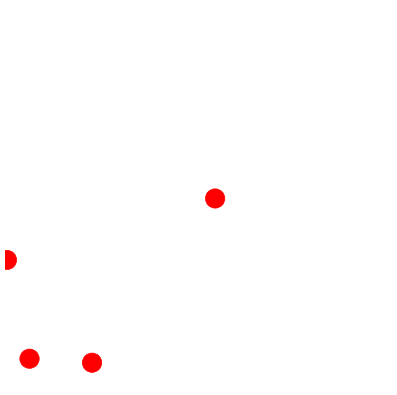

In [226]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_dpi(50)

def animate(i):

    ax.clear()

    for j in range(nparticles):

        Drawing_colored_circle = plt.Circle((positions[j][0][i],positions[j][1][i]),0.5,color='red')
        ax.add_artist( Drawing_colored_circle)

    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.axis('off')

ani = FuncAnimation(fig,animate,frames=100,interval=1,repeat=False)

ani.save('2D.gif')

#### 1D Walk Methods and Animation

MovieWriter ffmpeg unavailable; using Pillow instead.


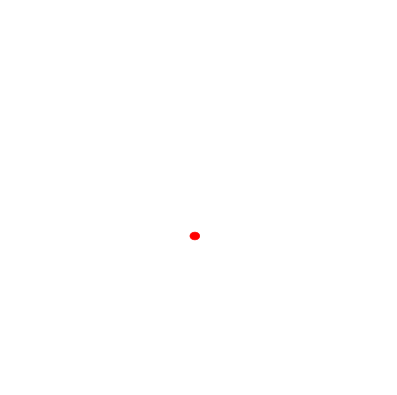

In [196]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import random

#create our figure for the animation
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_dpi(50)

#method to obtain the position of a particle
def getParticlePosition(particle_name):
    return particle_name.position

#method to change position of particle by a unit step 
def moveParticle(particle_name,step):
    particle_x = getParticlePosition(particle_name)
    angle=random.uniform(1,360)
    particle_name.position = (particle_x + random.choice([-1,0,1]))

#places particle randomly from -1 to 1 in 2D space
def placeParticle(particle_list, n):

    #create a particle object using this position
    for i in range(n):
        initial_positionx = np.random.uniform(-1,1)
        x=particle(2.5, initial_positionx,i)
        particle_list.append(x)

#prints particle ID
def printID(particle_name):
    print(particle_name.ID)

#create a simulation function
def simulation(steps,numparticles):
    particle_list = []
    #initialize your particles
    placeParticle(particle_list,numparticles)

    positions = []
    
    for i in range(len(particle_list)):
        posix=[]
        posiy=[]
        for j in range(steps):
            moveParticle(particle_list[i],1)
            coordx = getParticlePosition(particle_list[i])
            posix.append(coordx)
        positions.append(posix)
    
    #for i in range(numparticles):
    #    plt.plot(positions[i][0],positions[i][1])
    #    plotColorSpec(positions[i][0],positions[i][1])

    x = positions[0]

    return x

#run the simulation and store the data in X and Y
x1 = simulation(1000,1)

def animate(i):

    ax.clear()

    x_pos = x1[i]

    Drawing_colored_circle = plt.Circle((x_pos,10),1,color='red')
    ax.add_artist( Drawing_colored_circle)

    plt.xlim([-40,40])
    plt.ylim([-30,70])
    plt.axis('off')

ani = FuncAnimation(fig,animate,frames=100,interval=10,repeat=False)

ani.save('1D.gif')